## Goal: To build an evaluation system where the LLM scores creative writing submissions based on clear, measurable objectives.
- Tasks:
     - Define evaluation objectives:
       - Creativity: How original and innovative the writing is.
       - Coherence: Logical flow and readability.
        - Emotional Impact: Ability to evoke emotions effectively.
        - Users also can define their own custom evaluation criteria
    - Evaluation based on specific genre 

- Design Prompts:
  - Scoring Template: Design prompts to guide the LLM in scoring submissions. 
    - Include:
       - Objectives
      - Scoring scales
      - Instructions for constructive feedback.
  - Emphasizing Relative Comparisons
- Standardizing evaluation process 
  - Structured output
  - Iterative Testing and Refinement 
  

In [7]:
import openai
import matplotlib.pyplot as plt
openai.api_key = 'xyz' # write your own API key here

# In the following case 
-  evaluation criteria defined including ceativity , coherence and emotional impact, 
- the prompts are designed based on objective, scoring scales and instructions for providing feedback 
- the evaluation process is strictured based on numerical scores

In [3]:

def evaluate_creative_work(text):
    prompt = f"""
    You are an AI judge evaluating creative writing. 
    Evaluate the following work based on:
    1. Creativity (0-10): How original and innovative is it?
    2. Coherence (0-10): Does it flow logically and make sense?
    3. Emotional Impact (0-10): Does it evoke feelings effectively?

    Provide a score for each dimension and detailed feedback.

    Creative Work:
    "{text}"
    """
    
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[{"role": "user", "content": prompt}],
        temperature=0.7
    )
    return response["choices"][0]["message"]["content"]




In [4]:
# Example Creative Work
creative_work = "The stars whispered secrets of a forgotten time, where dreams danced on the edge of reality."
evaluation = evaluate_creative_work(creative_work)
print(evaluation)

1. Creativity: 8.5/10
The sentence is quite creative, employing personification (stars whispering) and metaphoric language (dreams dancing on the edge of reality) to create a mystical and dreamlike atmosphere. It suggests a connection between the cosmic and the personal, and the use of the concept of a 'forgotten time' adds an element of intrigue. It could be more creative by introducing more unique or unexpected elements.

2. Coherence: 7/10
The sentence is somewhat coherent, but it leans more toward the poetic and abstract. The metaphors are clear, but the sentence does not provide clear details about the setting, character, or plot. It's a standalone sentence, so it's hard to fully evaluate its coherence without more context. 

3. Emotional Impact: 9/10
The sentence has a strong emotional impact, evoking feelings of nostalgia, wonder, and perhaps even a bit of melancholy or longing. The phrase "forgotten time" could stir up feelings of loss for a past, while "dreams danced on the ed

# Compare two text

### In the following case 
- evaluation criteria defined including ceativity , coherence and emotional impact, 
- the prompts are designed based on objective, scoring scales and instructions for providing feedback and effective prompt design is based on emphasizing relative comparisons as LLM is comparing two texts rather than evaluating a single text 
- the evaluation process is strictured based on numerical scores

In [8]:
def compare_creative_works(work1, work2):
    prompt = f"""
    You are an AI judge comparing two creative writing pieces. 
    Evaluate them based on:
    1. Creativity (0-10):  How original and innovative is it?
    2. Coherence (0-10): Does it flow logically and make sense?
    3. Emotional Impact (0-10): Does it evoke feelings effectively?

    Provide a detailed comparison and scores for each dimension.

    Work 1:
    "{work1}"

    Work 2:
    "{work2}"
    """
    
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[{"role": "user", "content": prompt}],
        temperature=0.7
    )
    return response["choices"][0]["message"]["content"]




In [9]:
# Example Creative Works
work1 = "The sun kissed the horizon, bidding farewell with a fiery embrace."
work2 = "The moon rose silently, casting silver shadows on the sleeping world."

comparison = compare_creative_works(work1, work2)
print("Comparison Results:")
print(comparison)

Comparison Results:
Work 1:
1. Creativity: 7 - The author uses a creative metaphor to describe the setting of the sun, personifying it to make it seem as if it's kissing the horizon. It's not a completely original idea, but it's executed well.
2. Coherence: 10 - The sentence is clear and flows logically, with the sun setting being a natural event that is easy to visualize.
3. Emotional Impact: 8 - The phrasing of the sun bidding farewell with a fiery embrace evokes a sense of melancholy and the ending of a day. It's quite poignant and effective.

Work 2:
1. Creativity: 8 - The author also uses a metaphor to describe the rising of the moon, casting silver shadows. It's a slightly more original concept compared to the first work, with the idea of the moon's light being silver and creating shadows.
2. Coherence: 10 - This sentence also flows well and is logical, painting a vivid image of night time and the world sleeping.
3. Emotional Impact: 7.5 - The mention of the silence of the moon's

# Genre Specific Evaluation

### Customize evaluation criteria for different genres (e.g., poetry, fiction, technical writing).

### In the following case 
- evaluation criteria including ceativity , coherence and emotional impact, 
- the prompts are designed based on objective, scoring scales and instructions for providing feedback and effective prompt design is based on emphasizing relative comparisons as LLM is evaluating texts based on a genre 
- the evaluation process is strictured based on numerical scores

In [8]:
# Adding Genre-Specific Functionality:
 
def evaluate_genre_specific_work(text, genre):
    prompt = f"""
    You are an AI judge evaluating creative writing in the genre of {genre}. 
    Evaluate the following work based on:
    1. Creativity (0-10): Originality and innovative use of language in {genre}.
    2. Coherence (0-10): Logical flow and readability in {genre}.
    3. Emotional Impact (0-10): Ability to evoke emotions effectively in {genre}.

    Provide scores for each dimension and feedback for improvement.

    Creative Work:
    "{text}"
    """
    
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[{"role": "user", "content": prompt}],
        temperature=0.7
    )
    return response["choices"][0]["message"]["content"]

def extract_scores(response):
    """Extract scores from the LLM's response."""
    # response contains text like: "Creativity: x/10, Coherence: y/10, Emotional Impact: z/10"
    scores = {}
    for line in response.split("\n"):
        if "Creativity" in line:
            scores["Creativity"] = int(line.split(":")[1].split("/")[0].strip())
        elif "Coherence" in line:
            scores["Coherence"] = int(line.split(":")[1].split("/")[0].strip())
        elif "Emotional Impact" in line:
            scores["Emotional Impact"] = int(line.split(":")[1].split("/")[0].strip())
    return scores

def visualize_scores(scores):
    """Visualize scores dynamically."""
    dimensions = list(scores.keys())
    values = list(scores.values())
    
    plt.bar(dimensions, values, color='skyblue')
    plt.title("Genre-Specific Evaluation Scores")
    plt.xlabel("Dimensions")
    plt.ylabel("Scores (0-10)")
    plt.ylim(0, 10)
    plt.show()





Genre-Specific Evaluation:
1. Creativity: 8/10 - The use of personification for stars and waves is unique and provides an engaging and imaginative picture. However, the concept of stars and ocean being connected is not entirely new in the realm of poetry.
   
2. Coherence: 7/10 - The sentence flows well and is easy to read. However, it's only a single line, which makes it challenging to judge the overall coherence of a larger piece or poem. 

3. Emotional Impact: 6/10 - The imagery is rich and vivid, which can stir some emotional response. However, without more context or further development, the line's emotional impact is somewhat limited. 

Feedback: The line you've written is quite beautiful and evocative, but it would be beneficial to see it within the context of a larger poem. Also, consider exploring more unique or unexpected connections in your imagery to enhance the creativity of your writing. Expanding your work will also give you the opportunity to create a stronger emotional

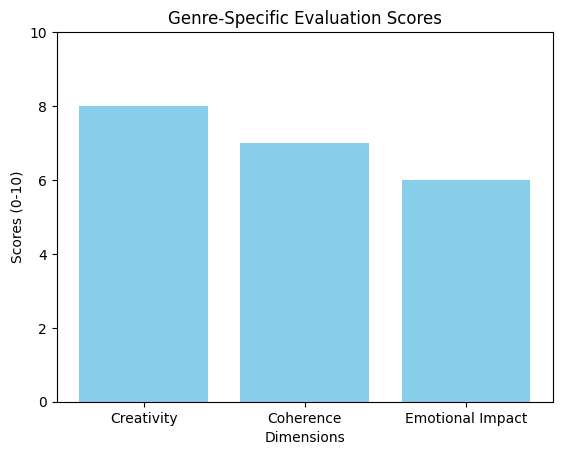

In [9]:
# Example Usage
creative_work = "The stars whispered secrets to the waves, painting dreams in their wake."
genre = "poetry"
evaluation = evaluate_genre_specific_work(creative_work, genre)
print("Genre-Specific Evaluation:")
print(evaluation)

# Extract scores dynamically
scores = extract_scores(evaluation)
print("Extracted Scores:")
print(scores)

# Visualize extracted scores
visualize_scores(scores)


# Allow users to write their own custom evaluation criteria 

### In the following case 
- evaluation criteria (custom evaluation) defined by users 
- the prompts are designed based on objective, scoring scales and instructions for providing feedback 
- the evaluation process is strictured based on numerical scores

In [10]:
def evaluate_with_custom_criteria(text, criteria):
    criteria_list = "\n".join([f"{i+1}. {crit}" for i, crit in enumerate(criteria)])
    prompt = f"""
    Evaluate the following creative work based on the custom criteria:
    {criteria_list}.

    Provide scores for each criterion and detailed feedback.

    Creative Work:
    "{text}"
    """
    
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[{"role": "user", "content": prompt}],
        temperature=0.7
    )
    return response["choices"][0]["message"]["content"]




Custom Evaluation Results:
1. Imagery: 9/10
The sentence is quite vivid and conjures a beautiful image of a serene forest singing lullabies. It elicits a sense of calmness and peace. However, it might have been more evocative with a few more specific details about the forest.

2. Pacing: 8/10
The pacing is pretty well done in this sentence. It is not too rushed nor too slow, but rather fitting for the tranquil scene being described. However, the pacing could have been extended a bit more to allow the readers to linger on the image created.

3. Engagement: 7/10
For just one sentence, it does a good job of engaging the reader. The personification of the forest singing lullabies piques the reader's interest and creates a sense of intrigue. However, it would have been more engaging if there were more details or a clear indication of a larger narrative. 

Overall, this sentence is a strong start and shows potential for a beautifully written piece. However, there is room for adding more intr

In [20]:
# Example Usage
custom_criteria = ["Imagery", "Pacing", "Engagement"]
creative_work = "The forest sang lullabies to the weary travelers."
custom_evaluation = evaluate_with_custom_criteria(creative_work, custom_criteria)
print("Custom Evaluation Results:")
print(custom_evaluation)

Custom Evaluation Results:
1. Imagery: 9/10
The imagery in this line is strong. It beautifully personifies the forest, suggesting that the sounds of the forest (like rustling leaves or a gentle wind) might be soothing like a lullaby. It also creates a vivid image of the weary travelers finding comfort in nature.

2. Pacing: N/A
As a single line, there's not enough content to accurately judge the pacing. However, the sentence itself doesn't rush its description or feeling, which suggests good pacing. 

3. Engagement: 8/10
The sentence is engaging due to its anthropomorphic depiction of the forest. It draws the reader in, making them curious about who these travelers are and why they are weary. Despite being only one line, it holds a lot of promise for an engaging story.


# Add Explanation of LLM Judgement
### Include a feature where the LLM explains how it arrived at the evaluation.

### In the following case 
- evaluation criteria defined such as creativity, coherence and emotional impact
- the prompts are designed based on objective, scoring scales and instructions for providing detailed reasoning for each defined criteria 
- the evaluation process is strictured based on numerical scores


In [11]:
def explain_evaluation(text):
    prompt = f"""
    Explain how you evaluated the following creative work. 
    Provide a detailed reasoning for each dimension (Creativity, Coherence, Emotional Impact).

    Creative Work:
    "{text}"
    """
    
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[{"role": "user", "content": prompt}],
        temperature=0.7
    )
    return response["choices"][0]["message"]["content"]



In [12]:
# Example Usage
creative_work = "The stars whispered secrets of a forgotten time."
explanation = explain_evaluation(creative_work)
print("Explanation of Evaluation:")
print(explanation)


Explanation of Evaluation:
Creativity: This sentence is highly creative. It uses personification, attributing human abilities to inanimate objects like stars. The concept of stars whispering secrets implies a mysterious, fantastical element. The phrase "a forgotten time" adds an aspect of timeless antiquity and mystery, inviting the reader to imagine what those secrets might be and what era they could be from. It's a unique and evocative way to describe a star-lit night and the ancient majesty of the cosmos.

Coherence: Despite its poetic nature, the sentence is coherent. While stars literally cannot whisper secrets, the metaphor is clear and understandable. The reader can infer that the stars might represent the past, with their light taking millions of years to reach us. The phrase "secrets of a forgotten time" is a bit more abstract, but it could allude to ancient history, forgotten civilizations, or the origins of the universe itself. The metaphor and the narrative are consistent w

# Demonstrating Prompt Engineering 
### Experiment with slight changes in prompts to show how they affect evaluations.

### In the following case 
- evaluation criteria defined such as creativity, coherence and emotional impact, cretaivity , coherence , engagement and uniqueness, flow and emotional connection
- the prompts are designed using all different types of prompts based on objective, scoring scales 
- the evaluation process is strictured based on numerical scores


In [13]:
# Tried different varities of prompts

def demonstrate_prompt_variations(text):
    prompts = [
        f"Evaluate the creative work for originality, readability, and emotional impact:\n{text}",
        f"Critique this writing piece based on creativity, coherence, and engagement:\n{text}",
        f"Score this creative work on its uniqueness, flow, and emotional connection:\n{text}"
    ]
    
    results = []
    for i, prompt in enumerate(prompts):
        response = openai.ChatCompletion.create(
            model="gpt-4",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.7
        )
        results.append((f"Prompt {i+1}", response["choices"][0]["message"]["content"]))
    
    return results




In [17]:
# Example usage 
creative_work = "The forest hummed with ancient secrets, carrying whispers through the trees."
results = demonstrate_prompt_variations(creative_work)
for prompt, result in results:
    print(prompt)
    print(result)
    print("---")

Prompt 1
Originality: 9/10 - The piece is quite original as it personifies the forest by giving it a voice and life of its own. It takes a unique perspective on the concept of a forest and turns it into something mystical and mysterious.

Readability: 10/10 - The sentence is well-constructed and easy to understand. The choice of words is simple yet imaginative, and it flows smoothly.

Emotional Impact: 8/10 - The sentence stirs up a sense of wonder and curiosity. It provokes the reader to imagine a forest that is alive and filled with untold stories. However, the emotional impact might vary among different readers as it depends on their personal interpretations and experiences.
---
Prompt 2
This piece is certainly creative, painting a vivid and mystical image of the forest. The use of personification - attributing the forest with the ability to hum and carry whispers - adds a layer of intrigue and curiosity. It is coherent, as it presents a complete thought and communicates a clear ima

# Add Iterative Feedback

### LLMs can guide users in improving their work with actionable feedback.


In [21]:
# illustrtation of feedback and iteration examples

def iterative_feedback(text):
    prompt = f"""
    Evaluate the following creative work and provide feedback for improvement.
    Then suggest how the revised version could score better.

    Creative Work:
    "{text}"
    """
    
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[{"role": "user", "content": prompt}],
        temperature=0.7
    )
    return response["choices"][0]["message"]["content"]




In [22]:
# Example Usage
creative_work = "The river whispered secrets as it carved its way through the forest."
feedback = iterative_feedback(creative_work)
print("Feedback and Suggestions:")
print(feedback)

Feedback and Suggestions:
Evaluation:

The sentence is beautifully crafted with effective imagery and personification. It creates a vivid scene in the reader's mind and conveys a sense of mystery and enchantment. The author uses the technique of personification by attributing the human ability to whisper secrets to the river, which adds depth to the content.

Feedback for Improvement:

Although the sentence is generally well written, it could potentially be improved by adding more specific details to further enhance the imagery and create a more immersive experience for the reader. 

Revised Version:

"The river whispered ancient secrets as it carved its relentless path through the verdant, whispering forest, its waters shimmering under the dappled sunlight." 

This revised version could score better because it adds more specific details (ancient secrets, relentless path, verdant forest, waters shimmering under dappled sunlight) that create a more vivid and engaging image for the reade

# Model selection 

### Model selection is a critical step in ensuring that the chosen LLM can meet the requirements of the evaluation task. The process involves testing and comparing different models to identify the one that provides the best balance of accuracy, reasoning ability, and instruction-following capability for your specific use case.





In [27]:

def evaluate_with_model(model_name, text, genre):
    """
    Evaluate creative work using the specified model.
    
    Args:
        model_name (str): The name of the LLM model (e.g., "gpt-3.5-turbo", "gpt-4").
        text (str): The creative work to evaluate.
        genre (str): The genre of the creative work.

    Returns:
        str: The response from the LLM.
    """
    prompt = f"""
    You are an AI judge evaluating creative writing in the genre of {genre}. 
    Evaluate the following work based on:
    1. Creativity (0-10): How original and innovative is it?
    2. Coherence (0-10): Does it flow logically and make sense?
    3. Emotional Impact (0-10): Does it evoke feelings effectively?

    Provide scores for each dimension and detailed feedback.

    Creative Work:
    "{text}"
    """
    try:
        response = openai.ChatCompletion.create(
            model=model_name,
            messages=[{"role": "user", "content": prompt}],
            temperature=0.7
        )
        return response["choices"][0]["message"]["content"]
    except Exception as e:
        return f"Error with {model_name}: {e}"



In [24]:
def test_multiple_models(models, text, genre):
    """
    Test multiple models on the same input and collect their outputs.
    
    Args:
        models (list): List of model names to test (e.g., ["gpt-3.5-turbo", "gpt-4"]).
        text (str): The creative work to evaluate.
        genre (str): The genre of the creative work.

    Returns:
        dict: A dictionary containing the model names and their outputs.
    """
    results = {}
    for model in models:
        print(f"Testing model: {model}")
        results[model] = evaluate_with_model(model, text, genre)
    return results



In [26]:
models_to_test = ["gpt-3.5-turbo", "gpt-4"]

# Define the creative work and genre
creative_work = "The sun kissed the horizon, painting the skies with hues of crimson and gold."
genre = "poetry"

# Test the models
results = test_multiple_models(models_to_test, creative_work, genre)

# Print the results for analysis
for model, output in results.items():
    print(f"Results from {model}:\n{output}\n")




Testing model: gpt-3.5-turbo
Testing model: gpt-4
Results from gpt-3.5-turbo:
Creativity: 7
The imagery of the sun kissing the horizon and painting the skies with crimson and gold is a common poetic trope, but it is still beautifully described and evocative.

Coherence: 8
The description of the sun kissing the horizon and painting the skies with hues of crimson and gold flows logically and paints a clear picture in the reader's mind.

Emotional Impact: 9
The use of colors like crimson and gold to describe the sunset evokes a sense of warmth, beauty, and awe. The imagery is vivid and impactful, making the reader feel the beauty of the scene described.

Overall, this work is well-crafted and evocative, with strong imagery that effectively conveys the beauty of a sunset. Great job!

Results from gpt-4:
Creativity: 5/10
Coherence: 10/10
Emotional Impact: 7/10

Feedback:

Creativity: The work is somewhat creative in that it uses metaphorical language (“the sun kissed the horizon”) to paint 